# Speech Emotion Recognition - SER

**Definition**

Speech Emotion Recognition or SER is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

**Why we need it?**

Emotion recognition is the part of speech recognition which is gaining more popularity and need for it increases enormously. Although there are methods to recognize emotion using machine learning techniques, this project attempts to use deep learning to recognize the emotions from data.

**For example**
1. SER is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services
2. It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen

**Datasets used in this project**

Crowd-sourced Emotional Mutimodal Actors Dataset (Crema-D)
Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
Surrey Audio-Visual Expressed Emotion (Savee)
Toronto emotional speech set (Tess)

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# librosa = Python library for analyzing audio and music. It can be used to extract the audio features from the audio files
import librosa # type: ignore
import librosa.display # type: ignore

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [124]:
# import tensorflow as tf
# from tensorflow import keras
# # import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequentialnb
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categoricaly
# from keras.callbacks import ModelCheckpoint

*Using TensorFlow backend.*

**Data Preparation**
- As we are working with four different datasets, so i will be creating a dataframe storing all emotions of the data in dataframe with their paths.
- We will use this dataframe to extract features for our model training.

In [125]:
# Paths for data.
Ravdess = "C:/Users/Netanel/Desktop/AI/data/ravdess/audio_speech_actors_01-24/"
Crema = "C:/Users/Netanel/Desktop/AI/data/cremad/AudioWAV/"
Tess = "C:/Users/Netanel/Desktop/AI/data/tess/TESS/"
Savee = "C:/Users/Netanel/Desktop/AI/data/savee/ALL/"

**1. [Ravdess Dataframe](https://www.kaggle.com/code/putrimaulidias23/starter-ravdess-emotional-speech-audio-602d6e95-d)**

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


In [126]:
# 1440 files in total.
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as there are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
1  neutral  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
2  neutral  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
3  neutral  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
4     calm  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...

**2. [Crema DataFrame](https://www.kaggle.com/datasets/ejlok1/cremad)**

In [127]:
# 7442 files in total. 
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...
1  disgust  C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...
2     fear  C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...
3    happy  C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...
4  neutral  C:/Users/Netanel/Desktop/AI/data/cremad/AudioW...

**3. [TESS dataset](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)**

In [128]:
# 2800 files in total. 
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...
1    angry  C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...
2    angry  C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...
3    angry  C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...
4    angry  C:/Users/Netanel/Desktop/AI/data/tess/TESS/OAF...

**4. [SAVEE dataset](https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee)**

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

- 'a' = 'anger'
- 'd' = 'disgust'
- 'f' = 'fear'
- 'h' = 'happiness'
- 'n' = 'neutral'
- 'sa' = 'sadness'
- 'su' = 'surprise'



In [129]:
# 480 files in total.
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...
1    angry  C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...
2    angry  C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...
3    angry  C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...
4    angry  C:/Users/Netanel/Desktop/AI/data/savee/ALL/DC_...

In [130]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
1  neutral  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
2  neutral  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
3  neutral  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...
4     calm  C:/Users/Netanel/Desktop/AI/data/ravdess/audio...

**Data Visualisation and Exploration**

First let's plot the count of each emotions in our dataset.

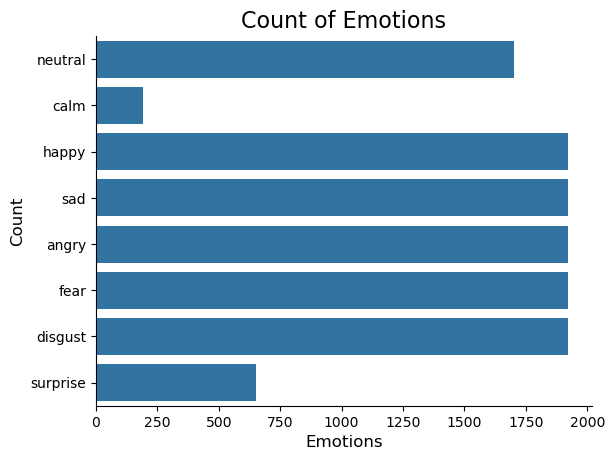

In [131]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

We can also plot waveplots and spectograms for audio signals

- Waveplots - Waveplots let us know the loudness of the audio at a given time.
- Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [187]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr, color="slateblue")
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

def calculate_ahsm(data, sr, e):
    # Average Harmonic Structure of Magnitude
    ahsm = librosa.feature.tonnetz(y=data, sr=sr)
    return ahsm



Tonal centroid features for each frame.

Tonnetz dimensions: (6, 1)

Fifth x-axis, Fifth y-axis, Minor x-axis, Minor y-axis, Major x-axis, Major y-axis

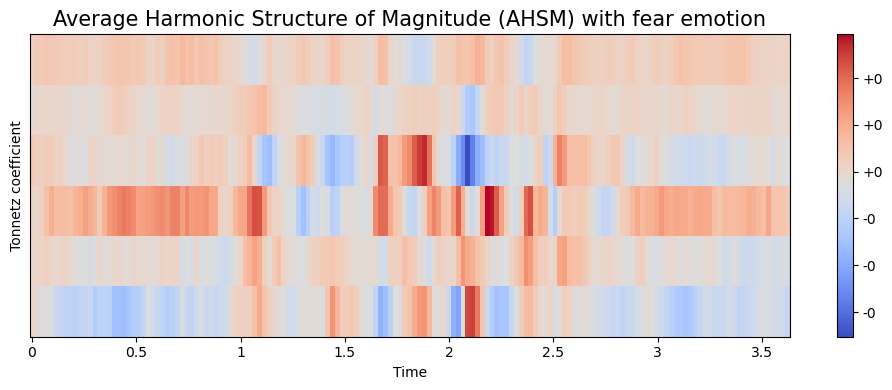

(6, 157)
[-0.04231908  0.0016854   0.06430065 -0.0147935  -0.00193726  0.02103832]


In [208]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
ahsm = calculate_ahsm(data, sampling_rate, emotion)

# Plot AHSM feature
plt.figure(figsize=(10, 4))
librosa.display.specshow(ahsm, sr=sampling_rate, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Average Harmonic Structure of Magnitude (AHSM) with {} emotion'.format(emotion), size=15)
plt.xlabel('Time')
plt.ylabel('Tonnetz coefficient')
plt.tight_layout()
plt.show()

print(ahsm.shape)
ahsm_means = np.mean(ahsm, axis=1)
print(ahsm_means)


Compute the tempogram: local autocorrelation of the onset strength envelope.

In [216]:
# Compute local onset autocorrelation
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

hop_length = 512
oenv = librosa.onset.onset_strength(y=data, sr=sampling_rate, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sampling_rate, hop_length=hop_length)

# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)

# Estimate the global tempo for display purposes
tempo = librosa.feature.tempo(onset_envelope=oenv, sr=sampling_rate, hop_length=hop_length)[0]

157
(384,)
512
384


ValueError: x and y must have same first dimension, but have shapes (384,) and (157,)

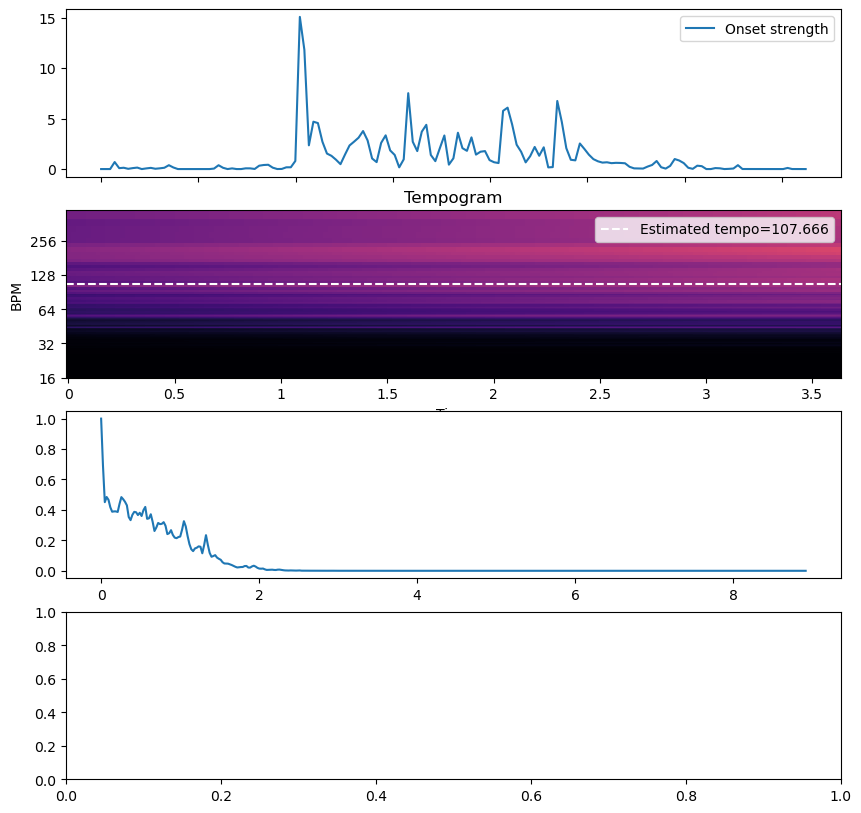

In [230]:
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sampling_rate, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sampling_rate, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
print(len(tempogram[0]))
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sampling_rate, num=tempogram.shape[0])
# ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
# print(x.shape)
print(hop_length)
print(len(x))
# ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
# ax[2].set(xlabel='Lag (seconds)')
# ax[2].legend(frameon=True)
# freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
# ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
#              label='Mean local autocorrelation', base=2)
# ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
#              label='Global autocorrelation', base=2)
# ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
#             label='Estimated tempo={:g}'.format(tempo))
# ax[3].legend(frameon=True)
# ax[3].set(xlabel='BPM')
# ax[3].grid(True)

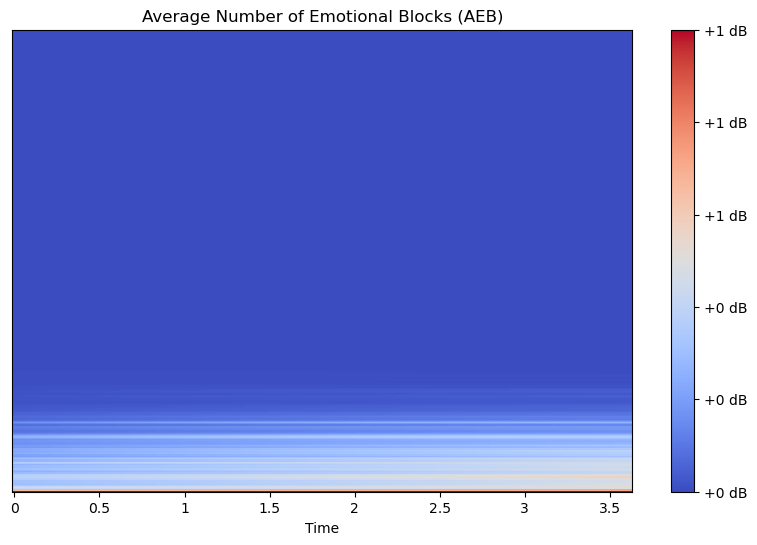

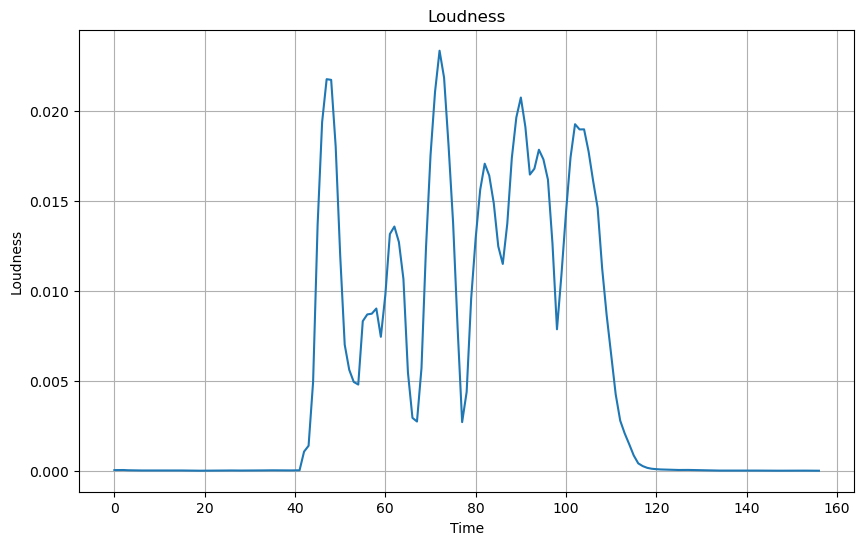

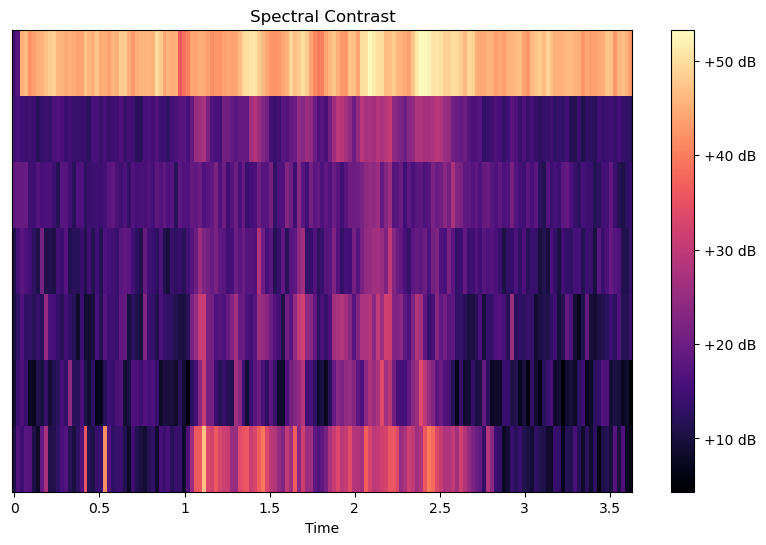

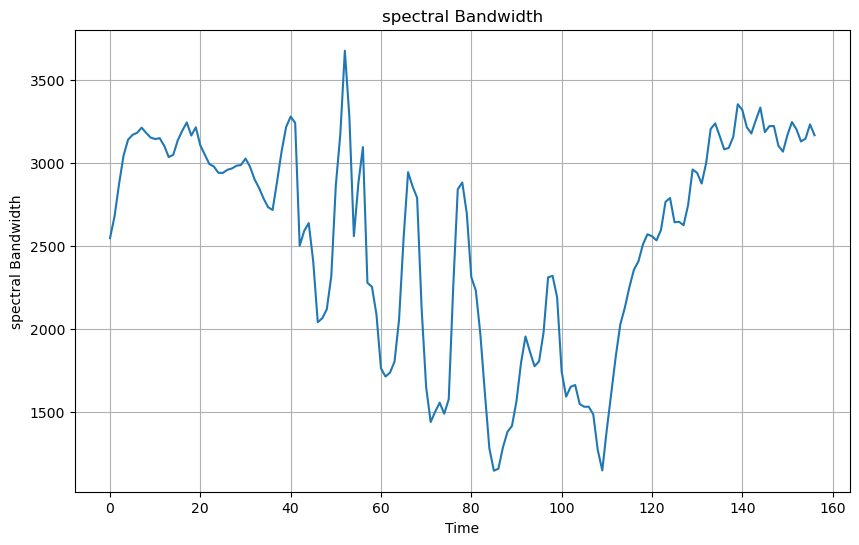

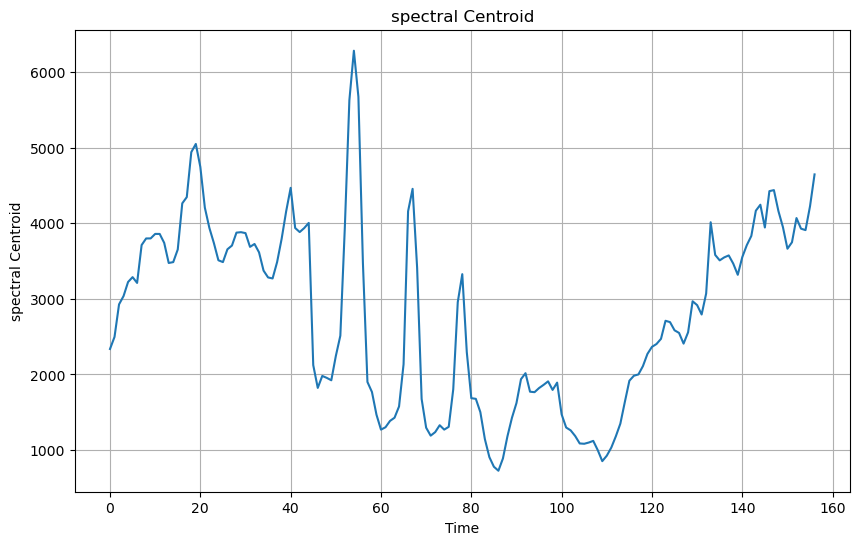

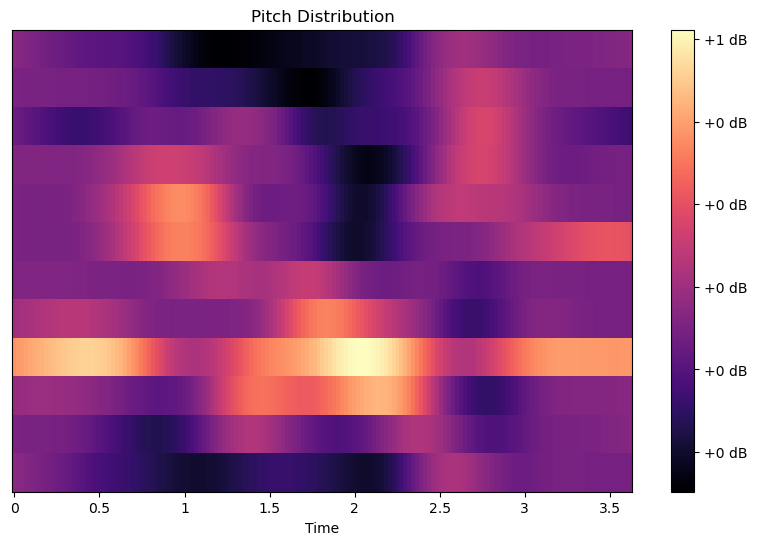

In [215]:
def plot_feature(feature, title, sr):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(feature, x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

def plot_1d_feature(feature, title, sr):
    plt.figure(figsize=(10, 6))
    plt.plot(feature.ravel())  # Ravel the array to convert it into a 1D array
    plt.xlabel('Time')
    plt.ylabel(title)
    plt.title(title)
    plt.grid(True)
    plt.show()
    


aeb = librosa.feature.tempogram(y=data, sr=sampling_rate)
plot_feature(aeb, 'Average Number of Emotional Blocks (AEB)',sampling_rate)

loudness = librosa.feature.rms(y=data)
plot_1d_feature(loudness,"Loudness",sampling_rate)

nse = librosa.feature.spectral_contrast(y=data, sr=sampling_rate)
plot_feature(nse, 'Spectral Contrast',sampling_rate)

we1 = librosa.feature.spectral_bandwidth(y=data, sr=sampling_rate)
plot_1d_feature(we1,"spectral Bandwidth",sampling_rate)

we2 = librosa.feature.spectral_centroid(y=data, sr=sampling_rate)
plot_1d_feature(we2,"spectral Centroid",sampling_rate)

npd = librosa.feature.chroma_cens(y=data, sr=sampling_rate)
plot_feature(npd, 'Pitch Distribution',sampling_rate)

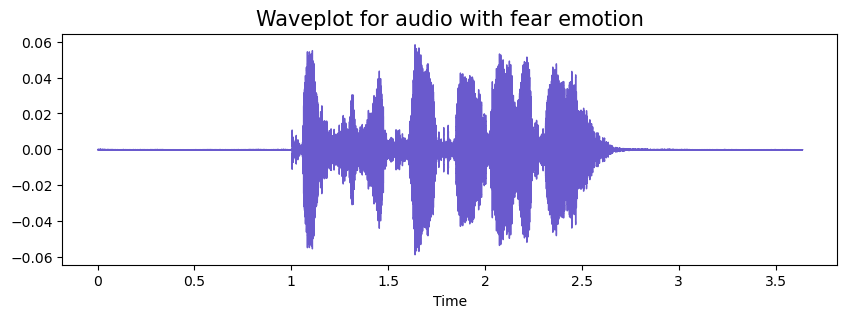

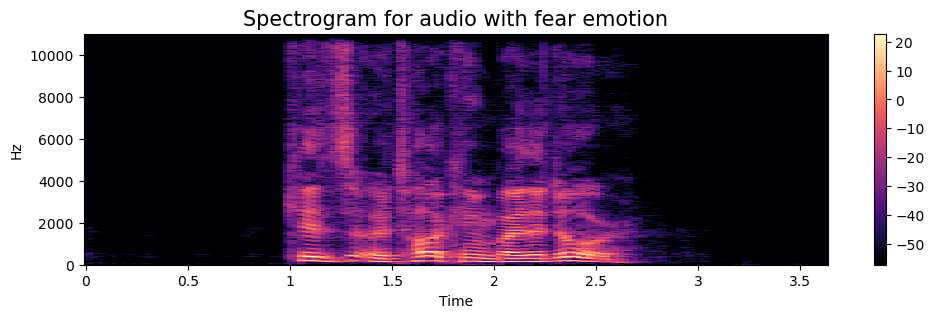

In [134]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

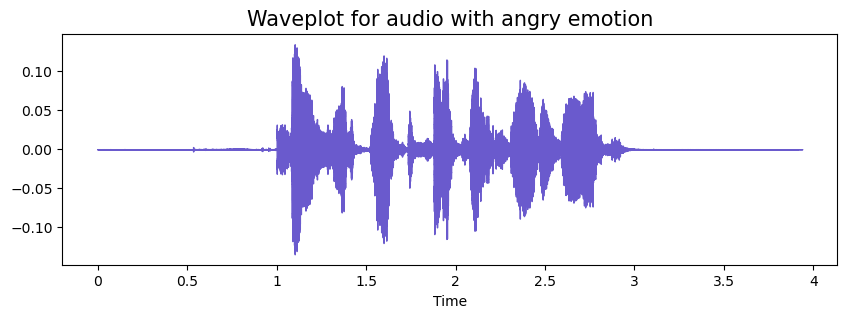

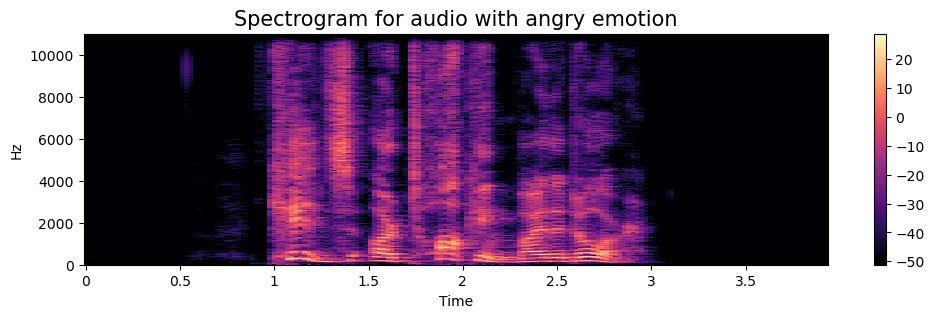

In [135]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

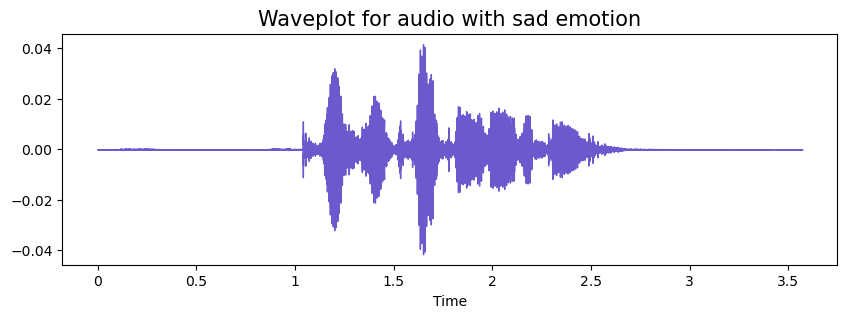

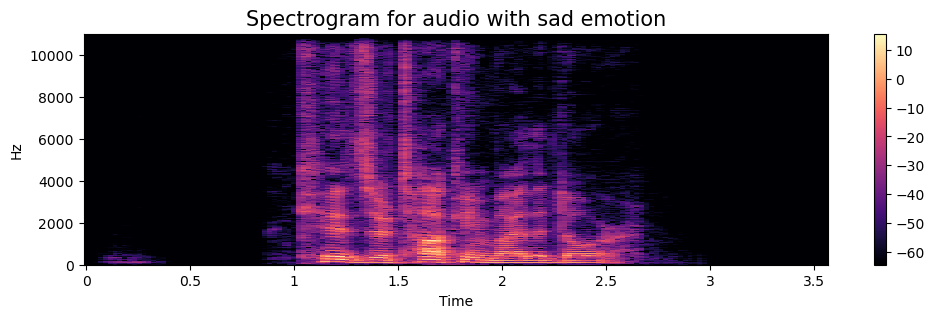

In [136]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

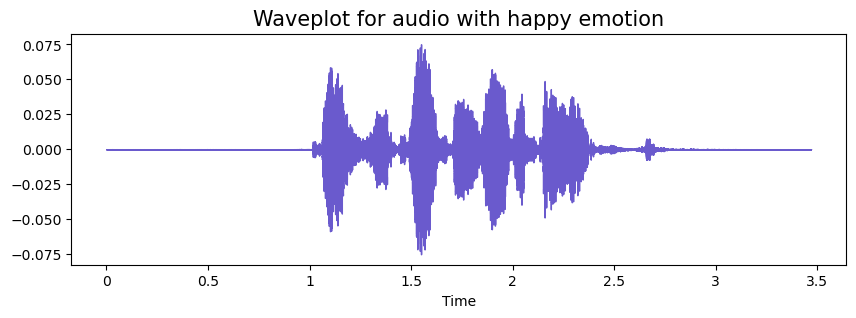

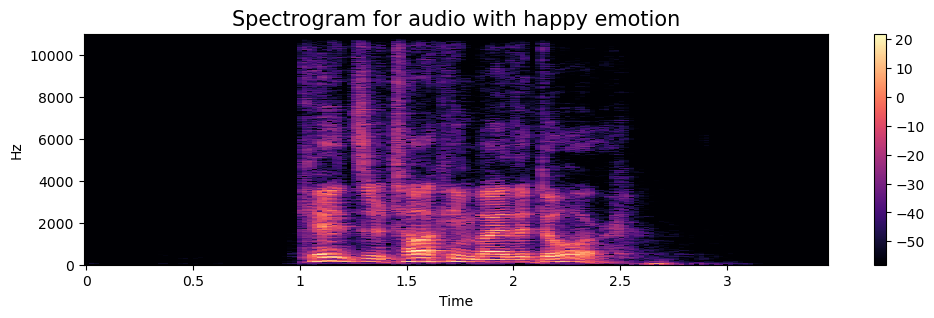

In [137]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

**Data Augmentation**

- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
- In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.

In [138]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio

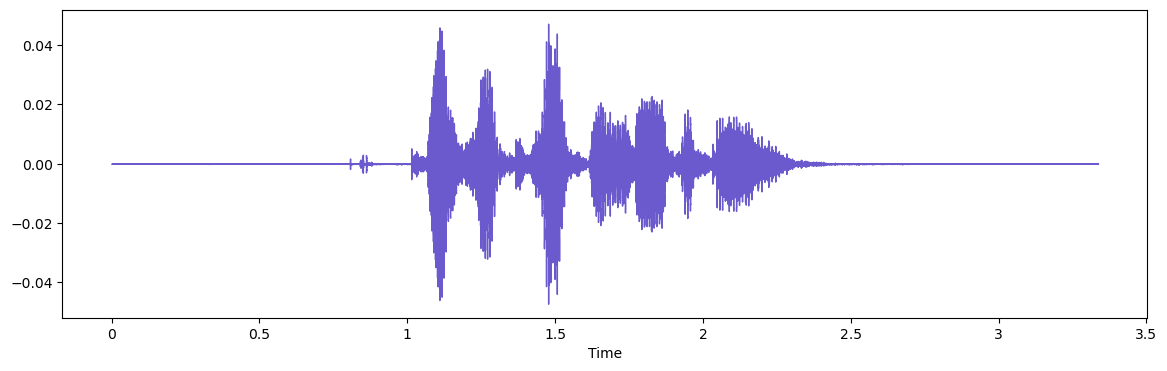

In [139]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate, color="slateblue")
Audio(path)

#### 2. Noise Injection

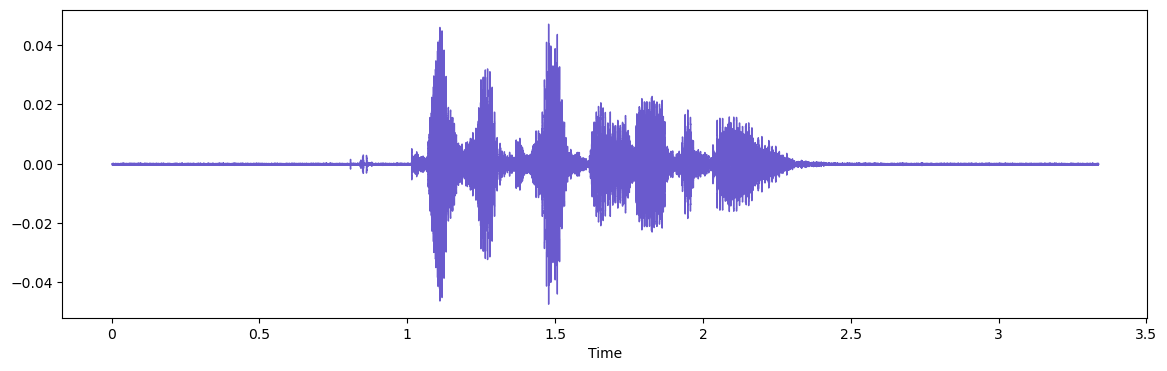

In [140]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color="slateblue")
Audio(x, rate=sample_rate)

We can see noise injection is a very good augmentation technique because of which we can assure our training model is not overfitted

#### 3. Stretching

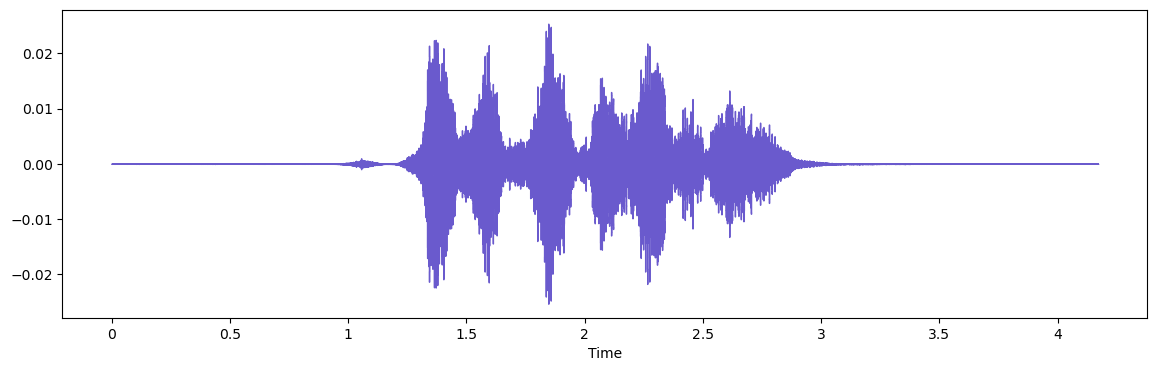

In [141]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color="slateblue")
Audio(x, rate=sample_rate)

#### 4. Shifting

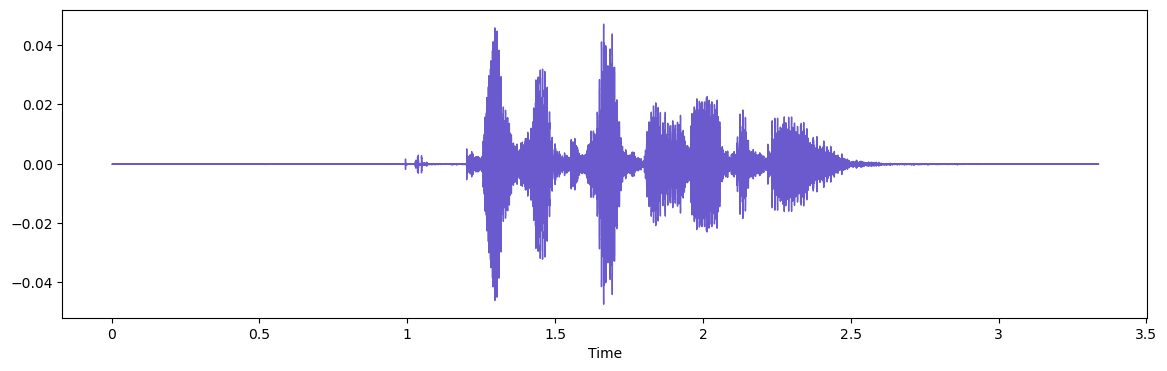

In [142]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color="slateblue")
Audio(x, rate=sample_rate)

#### 5. Pitch

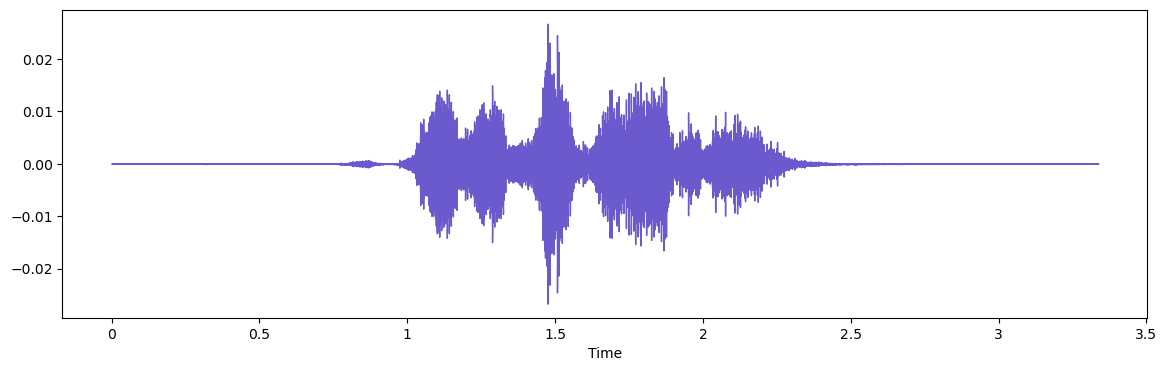

In [143]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate, color="slateblue")
Audio(x, rate=sample_rate)

- From the above types of augmentation techniques i am using noise, stretching (changing speed) and pitching.

## Feature Extraction
- Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.


The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

![image.png](https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg)

As stated there with the help of the sample rate and the sample data, one can perform several transformations on it to extract valuable features out of it.
01. **Zero Crossing Rate** : The rate of sign-changes of the signal during the duration of a particular frame.
02. **Energy** : The sum of squares of the signal values, normalized by the respective frame length.
03. **Entropy of Energy** : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
04. **Spectral Centroid** : The center of gravity of the spectrum.
05. **Spectral Spread** : The second central moment of the spectrum.
06. **Spectral Entropy** :  Entropy of the normalized spectral energies for a set of sub-frames.
07. **Spectral Flux** : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
08. **Spectral Rolloff** : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
09.  **MFCCs Mel Frequency Cepstral Coefficients** : form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
10. **Chroma Vector** : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
11. **Chroma Deviation** : The standard deviation of the 12 chroma coefficients.


In this project i am not going deep in feature selection process to check which features are good for our dataset rather i am only extracting 5 features:
- Zero Crossing Rate
- Chroma_stft
- MFCC
- RMS (root mean square) value
- Mel Spectogram to train our model.

In [207]:
def FixSamples(sample, sr, duration):
    leng = sr * 2 * duration
    fix_sample = np.zeros([leng,1])
    fix_sample[leng-len(sample):] = sample.reshape(sample.shape[0],1)
    return fix_sample[:,0]

def extract_features(data):
    # ZCR = zero crossing rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft = short time fourier transform
    # stft = two-dimensional numpy array representing the magnitude spectrogram of the audio.
    # chroma_stft = 12-element vector representing the chroma features extracted from the audio.    
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

    result = np.hstack((result, chroma_stft)) # stacking horizontally
 
    # MFCC = Mel-frequency cepstral coefficients = 12 coefficients that collectively make up an MFC.
    # MFCC 1: Overall spectral energy distribution.
    # MFCC 2: Spectral energy distribution, emphasizing spectral features.
    # MFCC 3-12: Higher-order coefficients representing additional spectral features, such as formants, timbre, and harmonics.
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # RMS = Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # Mel Spectogram
    # Mean operation computes the average power spectral density across all frequency bins for each time frame. (128 values)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)[:120]
    result = np.hstack((result, mel)) # stacking horizontally

    # AHSM feature 1D array
    ahsm = librosa.feature.tonnetz(y=data, sr=sample_rate).mean(axis=1)
    result = np.hstack((result, ahsm)) # stacking horizontally

    return result

def get_features(path):
    """
    Extracts features from audio data using various augmentations.

    Parameters:
    path (str): The path to the audio file.

    Returns:
    numpy.ndarray: A 2D array containing the extracted features.
                   The shape of the array is (n, m), where n is the number of augmentations
                   and m is the number of features extracted from each augmentation.
    """

    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [192]:
# Total number of audio files in the all datasets: 1440 + 7442 + 2800 + 480 = 12162
# 36486 rows, 163 columns = 1 zcr + 12 chroma features + 20 mel coeffiecients + 1 rms + 128 average power spectral density values + 1 emotion
# 12162 rows without augmentation
# 12162 rows with noise
# 12162 rows with stretching and pitching
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [195]:
len(X), len(Y), data_path.Path.shape

5

After we applied data augmentation and extracted the features for each audio files, we save them in a csv file.

|                                              | ZCR     | Chroma features      | Mel coefficients (20) | RMS | Average Power Spectral Density (128)| AHSM (6)   |Emotion |
|----------------------------------------------|---------|----------------------|-----------------------|-----|-------------------------------------|------------|--------|
| signals with no augmentation         (12162) |         |                      |                       |     |                                     |            |        |
| signals with noise                   (12162) |         |                      |                       |     |                                     |            |        |
| signals with stretching and pitching (12162) |         |                      |                       |     |                                     |            |        |



### Step 1. Data Preparation

- As of now we have extracted the data, now we need to normalize and split our data for training and testing.

To center the data (make it have zero mean and unit standard error), we subtract the mean and then divide the result by the standard deviation:

x′=(x−μ)/σ

We do that on the training set of the data. But then we have to apply the same transformation to your test set (e.g. in cross-validation), or to newly obtained examples before forecasting. Keep in mind that we have to use the exact same two parameters μ and σ (values) that we used for centering the training set.

Hence, every scikit-learn's transform's fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) and saves them as an internal object's state. Afterwards, we can call its transform() method to apply the transformation to any particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x, while also returning the transformed x′. Internally, the transformer object just calls first fit() and then transform() on the same data.

In [196]:
import pandas as pd

# Chroma features keys
chroma_keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Chroma features keys
ahsm_keys = ['AHSM1', 'AHSM2', 'AHSM3', 'AHSM4', 'AHSM5', 'AHSM6']

# Add labels to each column
column_labels = ['zcr'] + chroma_keys + ['mel_c{}'.format(i) for i in range(1, 21)] + ['rms'] + ['psd{}'.format(i) for i in range(1, 129)] + ahsm_keys

# Add row labels
row_labels = ['No aug'] * 12162 + ['Noise'] * 12162 + ['Stretc + Pitch'] * 12162

# Create a DataFrame with the features
Features = pd.DataFrame(X, columns=column_labels, index=row_labels)

Features['Emotion'] = Y

# Save the DataFrame to a CSV file named 'features.csv'
Features.to_csv('features.csv', index=False)

# Display the first few rows of the DataFrame (36486 signals, 163)
Features.head()


zcr         C        C#         D        D#         E         F  \
No aug  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
No aug  0.305560  0.792137  0.811962  0.797143  0.799393  0.794855  0.693689   
No aug  0.188256  0.622125  0.699215  0.753343  0.721212  0.701727  0.682356   
No aug  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
No aug  0.336209  0.782005  0.823816  0.826617  0.805959  0.811380  0.772769   

              F#         G        G#  ...    psd126    psd127        psd128  \
No aug  0.684966  0.733049  0.753972  ...  0.000007  0.000005  4.245835e-07   
No aug  0.673093  0.721891  0.759948  ...  0.000029  0.000026  2.280638e-05   
No aug  0.662828  0.686486  0.733960  ...  0.000002  0.000001  7.753986e-08   
No aug  0.628977  0.679179  0.707283  ...  0.000011  0.000006  4.254087e-07   
No aug  0.670527  0.701223  0.741058  ...  0.000170  0.000166  1.676738e-04   

           AHSM1     AHSM2     AHSM3     AHSM4     AHSM5     AHSM6  Emotion  
No aug -0.039651  0.017605 -0.038968 -0.058740  0.016288  0.010934  neutral  
No aug -0.002507  0.006176 -0.050195 -0.002115  0.001232  0.001177  neutral  
No aug  0.020187 -0.004298  0.011253 -0.072589  0.008186 -0.004174  neutral  
No aug -0.068961  0.034252 -0.058583 -0.055763  0.014269 -0.005250  neutral  
No aug -0.012740  0.009389 -0.065680  0.012359  0.002152 -0.003881  neutral  

[5 rows x 169 columns]

In [1]:
# Extracting features (X) and target (Y) from the 'Features' DataFrame
X = Features.iloc[:, :-1].values  # Selecting all rows and all columns except the last one as features
Y = Features['Emotion'].values    # Selecting the 'Emotion' column as the target

# Printing the shapes of the feature matrix (X) and target array (Y)
print(X.shape, Y.shape)

NameError: name 'Features' is not defined

### Step 2. Encode the Classes

In [198]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y_encoded = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(Y_encoded)
print(Y)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['neutral' 'neutral' 'neutral' ... 'surprise' 'surprise' 'surprise']


### Step 3. Split the Data into:
- Train Set
- Test Set

In [199]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 168), (27364,), (9122, 168), (9122,))

### Step 4. Feature Scaling

In [200]:
# scaling our data with sklearn's Standard scaler
"""
Standardization: StandardScaler standardizes features by removing the mean and scaling to unit variance. 
This ensures that each feature has a mean of 0 and a standard deviation of 1. 
Standardization makes the algorithm less sensitive to the scale of features and can help improve the convergence speed of gradient-based optimization algorithms.
Equal Importance: Scaling ensures that all features contribute equally to the model fitting process.
Without scaling, features with larger magnitudes may dominate the learning process, leading to biased parameter estimates.
Model Performance: Scaling can lead to better model performance, especially for algorithms that rely on distance-based metrics or regularization techniques.
"""
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 168), (27364,), (9122, 168), (9122,))

### Step 5: making our data compatible to model.

In [29]:
# making our data compatible to model.
# x_train = np.expand_dims(x_train, axis=2)
# x_test = np.expand_dims(x_test, axis=2)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

### Step 6: Model Selection and Training

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 4: Model Selection and Training
model = RandomForestClassifier()  # You can use any other classifier here
model.fit(x_train, y_train)



RandomForestClassifier()

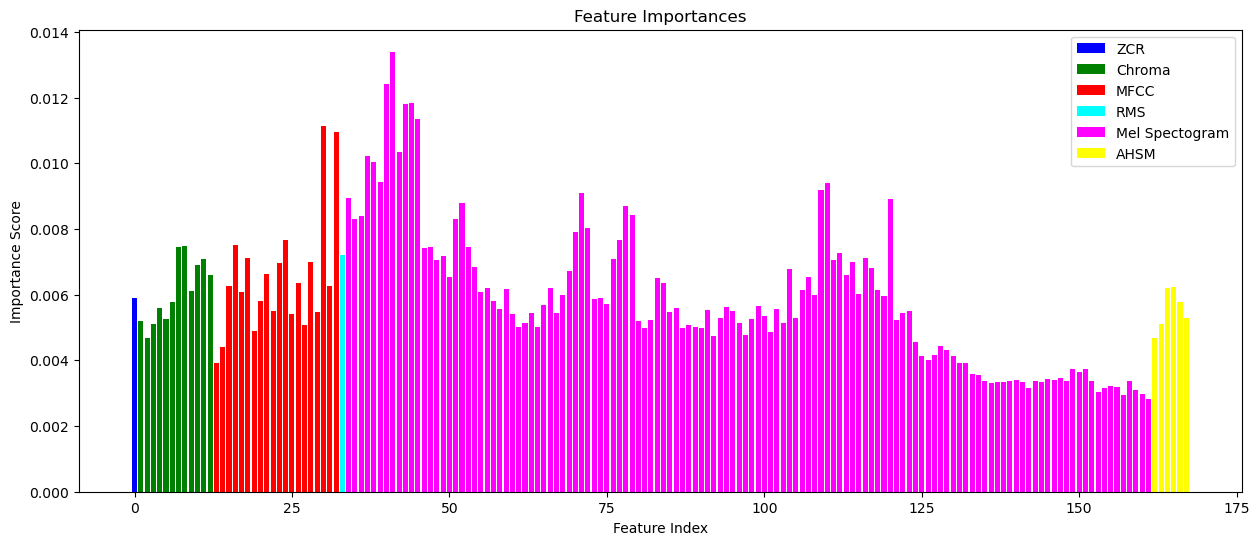

In [203]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define the number of features in each group
group_sizes = [1, 12, 20, 1, 128, 6]

# Define colors for each group
group_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Get feature importances
importances = model.feature_importances_

# Initialize starting index for each group
start_index = 0

# Plot feature importances with colors for each group
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.title("Feature Importances")
for i, size in enumerate(group_sizes):
    end_index = start_index + size
    group_importances = importances[start_index:end_index]
    
    # Create spaced out indices for better visualization
    spaced_indices = np.linspace(start_index, end_index - 1, num=size)
    class_labels =["ZCR", "Chroma", "MFCC", "RMS", "Mel Spectogram", "AHSM"]
    plt.bar(spaced_indices, group_importances, align="center", color=group_colors[i], label=class_labels[i])
    start_index = end_index

plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.legend()
plt.show()



In [59]:
print(Y)


['neutral' 'neutral' 'neutral' ... 'surprise' 'surprise' 'surprise']


- 0.00 to 0.19: Very weak correlation
- 0.20 to 0.39: Weak correlation
- 0.40 to 0.59: Moderate correlation
- 0.60 to 0.79: Strong correlation
- 0.80 to 1.00: Very strong correlation

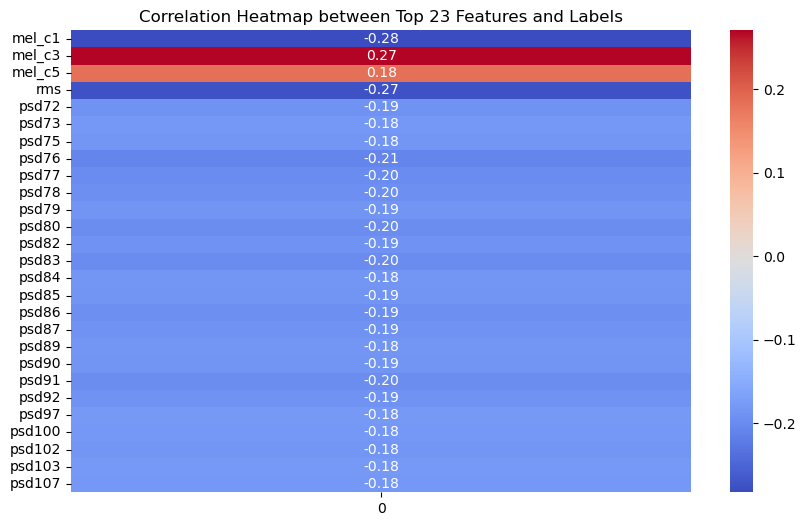

In [204]:
labels = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
def convert_labels(column, labels):
    label_to_int = {label: i for i, label in enumerate(labels)}
    return column.map(label_to_int)

features = Features.drop(columns=['Emotion'])  # Features
emotions = convert_labels(Features['Emotion'], labels) # Labels

# Compute correlation between features and labels
corr_matrix = features.corrwith(emotions)

# Filter out features with very weak correlation
filtered_features = corr_matrix[corr_matrix.abs() >= 0.18]

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_features.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap between Top 23 Features and Labels')
plt.show()

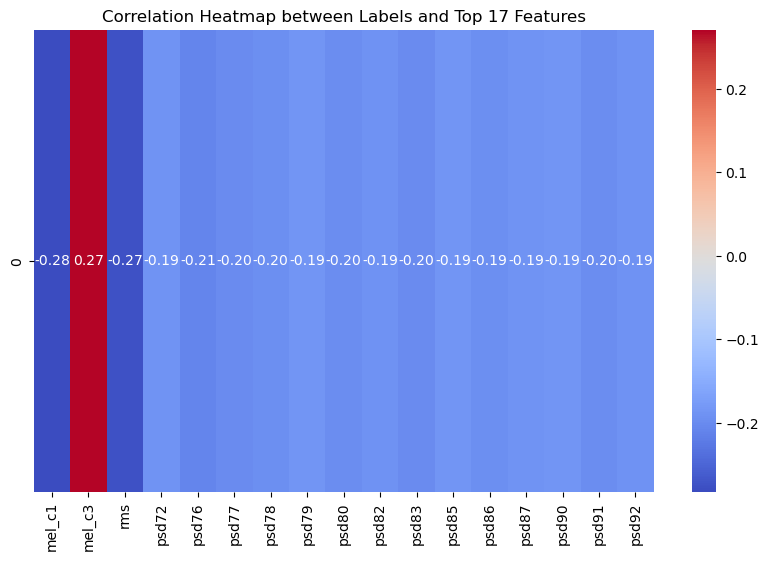

In [205]:
import seaborn as sns

# Define the function to convert labels to integers
def convert_labels(column, labels):
    label_to_int = {label: i for i, label in enumerate(labels)}
    return column.map(label_to_int)

# Drop the 'Emotion' column to get the features
features = Features.drop(columns=['Emotion'])

# Define the labels and convert them to integers
labels = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotions = convert_labels(Features['Emotion'], labels)

# Compute correlation between features and labels
corr_matrix = features.corrwith(emotions)

# Filter out features with very weak correlation
filtered_features = corr_matrix[corr_matrix.abs() >= 0.185]

# Plot heatmap of correlation matrix with switched axes
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_features.to_frame().T, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap between Labels and Top 17 Features')
plt.show()


In [206]:
print(f"Training size: {len(x_train)}, {len( y_train)}")
print(f"Testing size: {len(x_test)}, {len( y_test)}")
model.score(x_test, y_test)

Training size: 27364, 27364
Testing size: 9122, 9122


0.6678360008770007

### Step 7: Model Evaluation

In [35]:
y_pred = model.predict(x_test)
labels = ['natural', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']
print(y_pred, y_test)
print(classification_report(y_test, y_pred, target_names=labels))


['sad' 'disgust' 'angry' ... 'angry' 'happy' 'surprise'] ['disgust' 'disgust' 'angry' ... 'angry' 'happy' 'surprise']
              precision    recall  f1-score   support

     natural       0.72      0.81      0.76      1438
        calm       0.62      0.84      0.71       137
       happy       0.63      0.58      0.60      1468
         sad       0.76      0.51      0.61      1424
       angry       0.64      0.62      0.63      1462
        fear       0.65      0.67      0.66      1310
     disgust       0.61      0.78      0.68      1408
    surprise       0.89      0.80      0.84       475

    accuracy                           0.67      9122
   macro avg       0.69      0.70      0.69      9122
weighted avg       0.68      0.67      0.67      9122



1. natural: This class has relatively balanced precision and recall, indicating a good balance between correctly identifying positive instances and minimizing false positives. To further improve the F1-score, you could focus on refining the features or exploring more sophisticated models to capture subtle distinctions.

2. calm: This class has high recall but lower precision. To improve the F1-score, you may need to adjust the classification threshold to balance precision and recall more effectively. Additionally, consider incorporating additional features or data augmentation techniques to enhance model performance.

3. happy: The F1-score for this class is relatively low, indicating that the model struggles with both precision and recall. To address this, investigate whether there are specific patterns or characteristics in the data that could be better captured by the model. Feature engineering and fine-tuning hyperparameters may also help improve performance.

4. sad, angry, fear, disgust: These classes have varying F1-scores but generally show room for improvement in either precision or recall. Similar strategies as mentioned above can be applied, such as feature engineering, hyperparameter tuning, and addressing class imbalances.

5. surprise: This class has the highest F1-score among all classes, suggesting that the model performs well in identifying instances of surprise. However, it's essential to ensure that this performance is consistent across different datasets and that the model generalizes effectively.

In order to improve the F1-score:

- Experiment with feature engineering techniques to extract more discriminative features.
- Optimize hyperparameters of the model using techniques like grid search or random search.
- Address class imbalances by using techniques like oversampling, undersampling, or generating synthetic samples.
- Analyze misclassified instances and adjust the model or preprocessing steps accordingly.
- Consider using more advanced machine learning algorithms or ensemble methods that may better capture complex relationships in the data.

['disgust' 'disgust' 'angry' ... 'angry' 'happy' 'surprise']
['sad' 'disgust' 'angry' ... 'angry' 'happy' 'surprise']


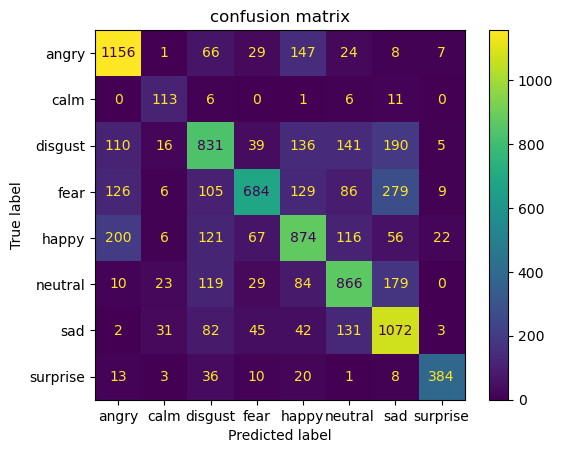

In [171]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(y_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title("confusion matrix")
plt.show()


From the report, you can see the performance of the classifier for each class individually, as well as an overall performance summary. For instance, class 0 has a precision of 0.87, recall of 0.57, and F1-score of 0.69. Similarly, the overall micro average F1-score is 0.50, indicating the overall performance of the classifier across all classes.


## We aim to improve the recall value in order to get the best predictions

#### 1. Adjust Classification Threshold
In a logistic regression classifier, we can adjust the classification threshold to increase recall by lowering it. 

#### 2. Class Balancing -> Results in less accurate Predictions
Using the class_weight parameter in the RandomForestClassifier to balance classes

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Step 4: Model Selection and Training
model = RandomForestClassifier(class_weight='balanced')
model.fit(x_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=labels))



              precision    recall  f1-score   support

       angry       0.71      0.80      0.76      1438
        calm       0.57      0.82      0.67       137
     disgust       0.61      0.57      0.59      1468
        fear       0.76      0.48      0.59      1424
       happy       0.61      0.60      0.60      1462
     neutral       0.63      0.66      0.65      1310
         sad       0.59      0.76      0.67      1408
    surprise       0.89      0.81      0.85       475

    accuracy                           0.66      9122
   macro avg       0.67      0.69      0.67      9122
weighted avg       0.66      0.66      0.65      9122



#### Abbreviations:
- AEB: average number of emotional blocks.
- AHSM: average harmonic structure of magnitude.
- DFT: discrete Fourier transform; EMO-DB: Berlin emotional speech database. F0: fundamental frequency.
- FFS: forward feature selection.
- GerDA: generalized discriminant analysis.
- GMM: Gaussian mixture model.
- HTK: hidden Markov toolkit.
- ITU: International Telecommunications Union.
- LLD: low level descriptor.
- LOSGO: leave one speaker group out.
- LOSO: leave one speaker out.
- MFCC: Mel-frequency cepstral coefficient.
- NPD: Normalized Perceptual Difference.
- NSE: normalized spectral envelope.
- openEAR: openEAR toolkit.
- PEAQ: perceptual evaluation of audio quality.
- q1-q4: quadrants in dimensional emotion.
- STFT: short-time Fourier transform.
- SVM: support vector machine.
- TEO: Teager energy operator.
- UA: unweighted.


#### 3. Feature Engineering:

It is concluded that the nine perceptual features have different order of importance involving different databases hence all of them should be used to achieve high classification accuracy. However, the features AHSM, AEB, WE1, and WE2 have the highest impact on classification. These features are derived from the perceptually masked “harmonic structure”, “temporal distribution of excitation levels”, and “perceptual bandwidth”.

1. In our system, the harmonic structure of the emotional audio is measured with a cepstrum-like analysis which gives a tonal content measure referred as average harmonic structure of magnitude (AHSM).

2. Another important emotional cue is excitation level extracted based on the perceptual masking model. Average number of emotional
blocks (AEB) as a feature provides a measure for the occurrence of high excitation levels through successive frame
groups analyzed in Bark scale.

3. Loudness (L) is also a frequently used asset in speech where our normalized emotional difference (NED) feature remarks the “local loudness” level in addition to the “loudness”. 

4. Another useful feature is the normalized spectral envelope (NSE1, NSE2, NSE3 ). The NSE enables us to model the envelope of loudness variations between emotional categories through successive frames.

6. WE1 & WE2 The perceptual bandwidth of the emotional audio is extracted by calculating the mean value over Y successive frames as:
$$
    W_E = \frac{1}{N} \sum_{n=0}^{Y-1} W_2[n]
$$

7. Normalized Perceptual Difference (NPD):

The main divergence and advantage of our features rely on the perceptual preprocessing steps that are used to model the human auditory system. These perceptual processes cover concepts such as, weighting the spectral components of the audio with the frequency response of
the outer and middle ear, using masking models including hearing threshold, and forward and backward masking models. Using these processes, we reformat the energy in a perceptual manner which becomes more compliant to the human auditory system.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#### 4. Algorithm Selection
Trying different algorithms such as Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

#### 5. Cost-sensitive Learning
Using the class_weight parameter with custom weights

In [ ]:
model = RandomForestClassifier(class_weight={0: 1, 1: 10})  # Adjust weights as needed


#### 6. Ensemble Methods
Using a VotingClassifier with different base models

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf1 = LogisticRegression()
clf2 = SVC()
model = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2)], voting='hard')

#### 7. Resampling Techniques
Using SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


#### 8. Model Evaluation and Fine-tuning
Using SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')

#### 9. Feature Selection
Using Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=10)
X_selected = rfe.fit_transform(x_train, y_train)

#### 10. Domain Knowledge
Identifying relevant features based on domain knowledge and including them in the feature set. For example, if predicting customer churn, including variables such as customer tenure or usage patterns based on domain expertise.